### Dataset : Asia Cup Match Data Analysis 

1. Why This Project?
1. Analyze historical performance in Asia Cup matches (1984–2022).
2. Investigate the impact of the Toss decision (Batting vs. Bowling) on the Result.
3. Use NumPy for aggregate statistics (e.g., average runs scored).
4. Visualize batting metrics (e.g., Run Scored, Run Rate).

## 2. Import Libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Load Dataset




In [5]:
df_asia = pd.read_csv('asiacup.csv')
df_asia.head()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win


## 4. Explore Data

In [6]:
print("Shape:", df_asia.shape)
print(df_asia.info())
print(df_asia.isnull().sum())
print(df_asia.describe())

Shape: (254, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       254 non-null    object 
 1   Opponent                   254 non-null    object 
 2   Format                     254 non-null    object 
 3   Ground                     254 non-null    object 
 4   Year                       254 non-null    int64  
 5   Toss                       254 non-null    object 
 6   Selection                  254 non-null    object 
 7   Run Scored                 252 non-null    float64
 8   Wicket Lost                252 non-null    float64
 9   Fours                      252 non-null    float64
 10  Sixes                      252 non-null    float64
 11  Extras                     252 non-null    float64
 12  Run Rate                   252 non-null    float64
 13  Avg Bat Strike Rate        252 no

## 5. Data Cleaning

In [7]:
df_asia_clean = df_asia.dropna(subset=['Run Scored'])

# Verification
print("Shape after dropping nulls:", df_asia_clean.shape)
print("Missing values check (Run Scored):", df_asia_clean['Run Scored'].isnull().sum())

Shape after dropping nulls: (252, 20)
Missing values check (Run Scored): 0


## 6. Analysis with NumPy & Pandas

In [8]:
avg_runs = np.mean(df_asia_clean['Run Scored'])
print(f"1. Overall Average Run Scored: {avg_runs:.2f}")

avg_wickets_lost = np.mean(df_asia_clean['Wicket Lost'])
print(f"2. Average Wicket Lost Per Innings: {avg_wickets_lost:.2f}")

df_asia_wins = df_asia_clean[df_asia_clean['Result'].isin(['Win', 'Lose'])].copy()
df_asia_wins['Toss_Win'] = df_asia_wins['Result'].apply(lambda x: 1 if x == 'Win' else 0)

selection_win_rate = df_asia_wins.groupby('Selection')['Toss_Win'].mean().sort_values(ascending=False)
print("\n3. Win Rate by Toss Selection:\n", selection_win_rate.apply(lambda x: f'{x:.2%}'))

win_counts = df_asia_wins[df_asia_wins['Result'] == 'Win']['Team'].value_counts().head(3)
print("\n4. Top 3 Teams by Total Wins:\n", win_counts)

1. Overall Average Run Scored: 201.92
2. Average Wicket Lost Per Innings: 6.89

3. Win Rate by Toss Selection:
 Selection
Bowling    53.66%
Batting    45.97%
Name: Toss_Win, dtype: object

4. Top 3 Teams by Total Wins:
 Team
Sri Lanka    39
India        39
Pakistan     31
Name: count, dtype: int64


## 7. Visualization with Matplotlib

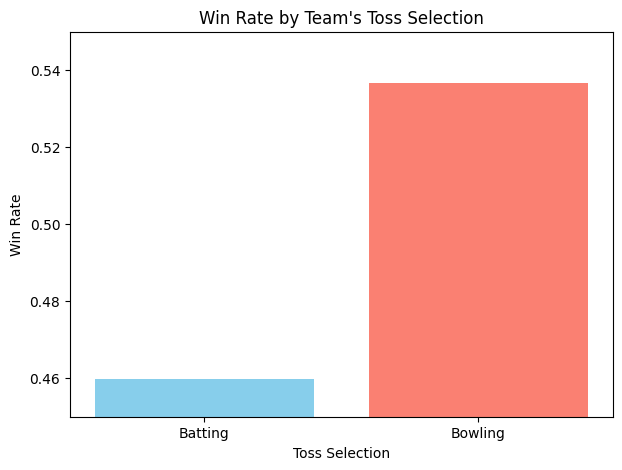

In [10]:
selection_win_rate = df_asia_wins.groupby('Selection')['Toss_Win'].mean()
selection_names = selection_win_rate.index
win_rates = selection_win_rate.values

plt.figure(figsize=(7, 5))
plt.bar(selection_names, win_rates, color=['skyblue', 'salmon'])
plt.title("Win Rate by Team's Toss Selection")
plt.xlabel("Toss Selection")
plt.ylabel("Win Rate")
plt.ylim(0.45, 0.55) 
plt.show()

### Insights:
The visualization confirms a slight advantage for teams that choose to Bowl first, though the difference is minimal, suggesting the toss decision is not a massive determining factor in the overall result.

## 8. Visualization with Seaborn

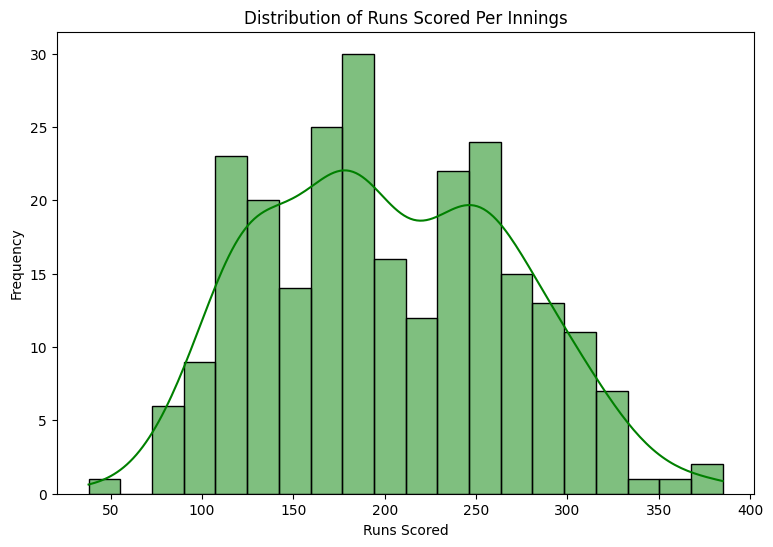

In [11]:
# Histogram of Run Scored
plt.figure(figsize=(9, 6))
sns.histplot(df_asia_clean['Run Scored'], bins=20, kde=True, color='green')
plt.title("Distribution of Runs Scored Per Innings")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()

### Insights:
The distribution of runs is approximately normal, centered around the 200-run mark. There is a slight tail towards higher scores, with a few innings exceeding 350 runs.

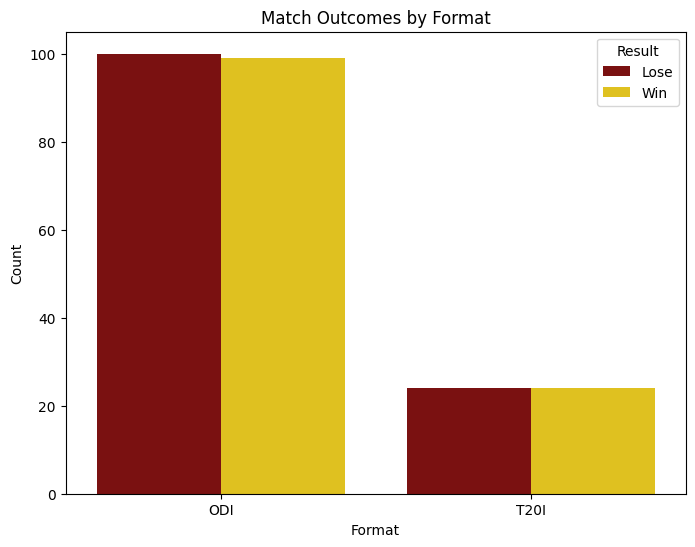

In [12]:
# Countplot of Win/Loss by Match Format
plt.figure(figsize=(8, 6))
sns.countplot(x='Format', hue='Result', data=df_asia_wins, palette={'Win': 'gold', 'Lose': 'darkred'})
plt.title("Match Outcomes by Format")
plt.xlabel("Format")
plt.ylabel("Count")
plt.show()

### Insights:
1. The dataset primarily consists of ODI (One Day International) matches, with a much smaller number of T20I (Twenty20 International) matches.

2. The number of Wins and Losses is balanced for both formats, as expected for a comprehensive match record dataset.

C:\Users\tranu\AppData\Local\Temp\ipykernel_19356\2325195304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y='Run Rate', data=df_asia_wins[df_asia_wins['Result'].isin(['Win', 'Lose'])], palette={'Win': 'teal', 'Lose': 'salmon'})


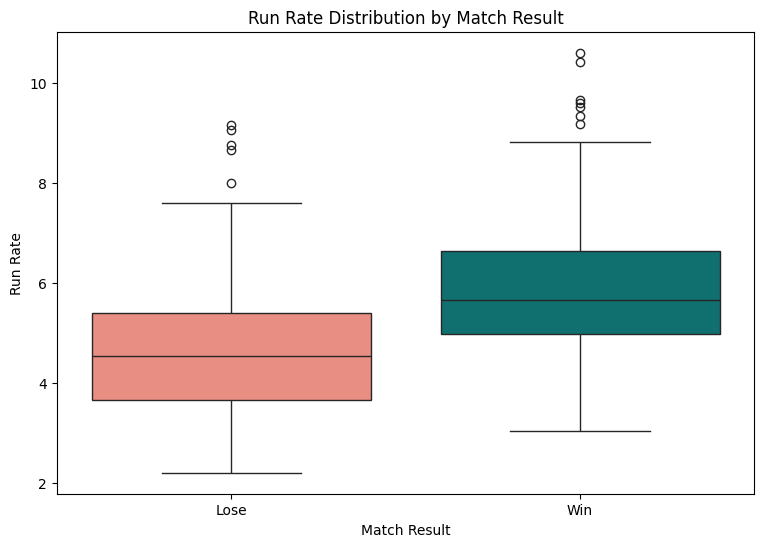

In [13]:
# Boxplot of Run Rate by Match Result
plt.figure(figsize=(9, 6))
sns.boxplot(x='Result', y='Run Rate', data=df_asia_wins[df_asia_wins['Result'].isin(['Win', 'Lose'])], palette={'Win': 'teal', 'Lose': 'salmon'})
plt.title("Run Rate Distribution by Match Result")
plt.xlabel("Match Result")
plt.ylabel("Run Rate")
plt.show()

### Insights:
Teams that Win clearly have a higher median Run Rate and a tighter distribution of run rates compared to teams that Lose, emphasizing the importance of a high scoring rate in winning matches.